# Load data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sim1_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleA.csv")
sim2_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleB.csv")
sim3_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleC.csv")
sim4_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleD.csv")
sim5_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleE.csv")
sim6_base = pd.read_csv("DATA SOURCES/Multiple Cycle Simulation/data_upload/simulation_results_unpivot_CycleF.csv")

In [4]:
sim1 = sim1_base.copy()
sim2 = sim2_base.copy()
sim3 = sim3_base.copy()
sim4 = sim4_base.copy()
sim5 = sim5_base.copy()
sim6 = sim6_base.copy()

# Investigation of data


In [5]:
sim1.columns

Index(['Time_out', 'BatchID', 'CleaningID', 'EventFrameID_Reference',
       'EventFrameLabel_Current', 'F1_Cooling_Water_PV', 'F2_Steam_PV',
       'H1_WithSensorNoise_PV', 'H1_WithoutSensorNoise_PV', 'Hatch_Digital',
       'L1_WithSensorNoise_PV', 'L1_WithoutSensorNoise_PV', 'N1_PV',
       'Y1_Digital', 'Y2_Digital', 'Y3_Digital', 'Y4_Digital', 'Y5_Digital',
       'Y6_Digital'],
      dtype='object')

In [6]:
sim1.BatchID.unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
      dtype=int64)

## Investigation of BatchID 0


In [7]:
np.where(sim1.BatchID == 0)

(array([  15741,   15742,   15743, ..., 1097892, 1097893, 1097894],
       dtype=int64),)

In [8]:
# If BatchID == 0, then in state 11
print("BatchID == 0, EventFrameID_Reference" ,sim1[sim1.BatchID == 0].EventFrameID_Reference.unique())
print("BatchID == 0, EventFrameID_Reference" ,sim2[sim2.BatchID == 0].EventFrameID_Reference.unique())
print("BatchID == 0, EventFrameID_Reference" ,sim3[sim3.BatchID == 0].EventFrameID_Reference.unique())
print("BatchID == 0, EventFrameID_Reference" ,sim4[sim4.BatchID == 0].EventFrameID_Reference.unique())
print("BatchID == 0, EventFrameID_Reference" ,sim5[sim5.BatchID == 0].EventFrameID_Reference.unique())
print("BatchID == 0, EventFrameID_Reference" ,sim6[sim6.BatchID == 0].EventFrameID_Reference.unique())

# If BatchID != 0, then not in state 11
print("BatchID != 0, EventFrameID_Reference" ,sim1[sim1.BatchID != 0].EventFrameID_Reference.unique())
print("BatchID != 0, EventFrameID_Reference" ,sim2[sim2.BatchID != 0].EventFrameID_Reference.unique())
print("BatchID != 0, EventFrameID_Reference" ,sim3[sim3.BatchID != 0].EventFrameID_Reference.unique())
print("BatchID != 0, EventFrameID_Reference" ,sim4[sim4.BatchID != 0].EventFrameID_Reference.unique())
print("BatchID != 0, EventFrameID_Reference" ,sim5[sim5.BatchID != 0].EventFrameID_Reference.unique())
print("BatchID != 0, EventFrameID_Reference" ,sim6[sim6.BatchID != 0].EventFrameID_Reference.unique())

BatchID == 0, EventFrameID_Reference [ 11.1  11.2  11.3  11.4  11.5 -11. ]
BatchID == 0, EventFrameID_Reference [11.1 11.2 11.3 11.4 11.5]
BatchID == 0, EventFrameID_Reference [ 11.1  11.2  11.3  11.4  11.5 -11. ]
BatchID == 0, EventFrameID_Reference [ 11.1  11.2  11.3  11.4  11.5 -11. ]
BatchID == 0, EventFrameID_Reference [11.1 11.2 11.3 11.4 11.5]
BatchID == 0, EventFrameID_Reference [11.1 11.2 11.3 11.4 11.5]
BatchID != 0, EventFrameID_Reference [ 1.   2.   3.1  3.2  4.1  4.2  4.3  5.   6.   7.  -7.   8.  -8.   9.
 10.  -1.  -3.  -5. ]
BatchID != 0, EventFrameID_Reference [  1.    2.    3.1   3.2   4.1   4.2   4.3  -4.    5.   -5.    6.   -6.
   7.    8.    9.   10.  -10.   -1. ]
BatchID != 0, EventFrameID_Reference [ 1.   2.   3.1  3.2 -3.   4.1  4.2  4.3 -4.   5.  -5.   6.  -6.   7.
  8.  -8.   9.  10.  -1.  -7. ]
BatchID != 0, EventFrameID_Reference [  1.    2.    3.1   3.2  -3.    4.1   4.2   4.3   5.   -5.    6.   -6.
   7.   -7.    8.   -8.    9.   -9.   10.   -2.   -4.  -10.

Conclusion: BatchID == 0 svarer til at batchen er i rensestadie (tanken). Disse bliver også undersøgt herunder (først kun med abs værdi)


array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

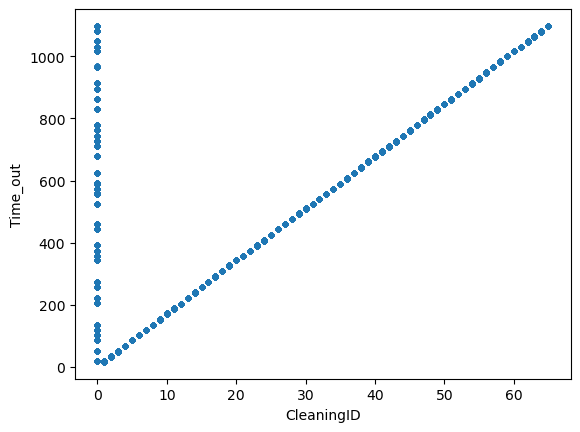

In [9]:
# BatchID == 0 Skal grupperes efter tider (ikke samme renseprocess/CIP -> CleaningID)
plt.plot(sim1[sim1.BatchID == 0].CleaningID,sim1[sim1.BatchID == 0].Time_out,'.')
plt.xlabel("CleaningID")
plt.ylabel("Time_out")
sim1[sim1.BatchID == 0].CleaningID.unique()

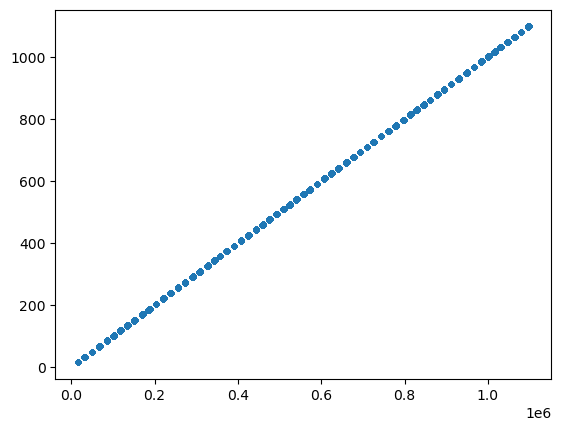

In [10]:
plt.plot(sim1[sim1.BatchID == 0].Time_out,'.')

Der er en cleaning imellem alle batches, ser det ud til


In [11]:
sim1[(sim1.BatchID == 0) & (sim1.CleaningID == 0) ].EventFrameID_Reference.unique()

array([11.5])

Det konkluderes at BatchID == 0 er ensbetydende med oprensning af tanken. Dette kan der også modelleres dybere -> korrelation med forhenværende cycle


# Production cycles


In [12]:
sim1_production = sim1[sim1.BatchID != 0].copy()
sim2_production = sim2[sim2.BatchID != 0].copy()
sim3_production = sim3[sim3.BatchID != 0].copy()
sim4_production = sim4[sim4.BatchID != 0].copy()
sim5_production = sim5[sim5.BatchID != 0].copy()
sim6_production = sim6[sim6.BatchID != 0].copy()

In [13]:
# Check that production only contains non-cleaning (check)
print(sim1_production.CleaningID.unique())
print(sim2_production.CleaningID.unique())
print(sim3_production.CleaningID.unique())
print(sim4_production.CleaningID.unique())
print(sim5_production.CleaningID.unique())
print(sim6_production.CleaningID.unique())

[0]
[0]
[0]
[0]
[0]
[0]


## Plots


In [14]:
sim1_eventID = sim1_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim1_timeout = sim1_production.groupby(['BatchID']).Time_out.apply(np.array)

sim2_eventID = sim2_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim2_timeout = sim2_production.groupby(['BatchID']).Time_out.apply(np.array)

sim3_eventID = sim3_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim3_timeout = sim3_production.groupby(['BatchID']).Time_out.apply(np.array)

sim4_eventID = sim4_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim4_timeout = sim4_production.groupby(['BatchID']).Time_out.apply(np.array)

sim5_eventID = sim5_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim5_timeout = sim5_production.groupby(['BatchID']).Time_out.apply(np.array)

sim6_eventID = sim6_production.groupby(['BatchID']).EventFrameID_Reference.apply(np.array)
sim6_timeout = sim6_production.groupby(['BatchID']).Time_out.apply(np.array)


# Concatenate all data
c_eventID = np.concatenate(
    [
        sim1_eventID,
        sim2_eventID,
        sim3_eventID,
        sim4_eventID,
        sim5_eventID,
        sim6_eventID
    ]
)

c_timeout = np.concatenate(
    [
        sim1_timeout,
        sim2_timeout,
        sim3_timeout,
        sim4_timeout,
        sim5_timeout,
        sim6_timeout
    ]
)

Text(0, 0.5, 'label')

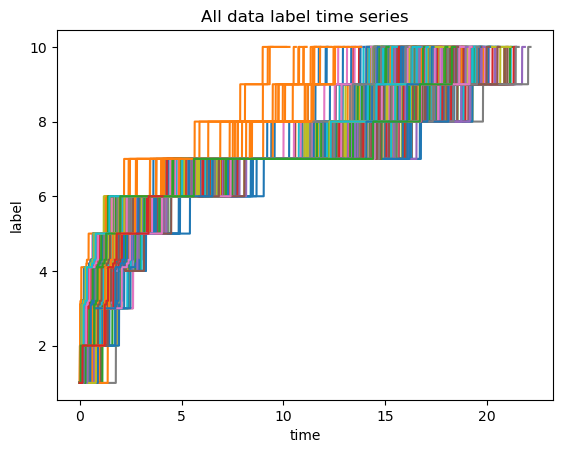

In [15]:
for t,e in zip(c_timeout, c_eventID):
    plt.plot( t - t[0] , np.abs(e))

plt.title("All data label time series")
plt.xlabel("time")
plt.ylabel("label")

### plots for a single simulation

In [16]:
sim1_prod_abs = sim1_production.copy()
sim1_prod_abs.EventFrameID_Reference = sim1_prod_abs.EventFrameID_Reference.apply(np.abs)
event_times1 = sim1_prod_abs.groupby(["EventFrameID_Reference", "BatchID" ]).Time_out.apply( np.array ).apply( lambda x : x[-1] - x[0])

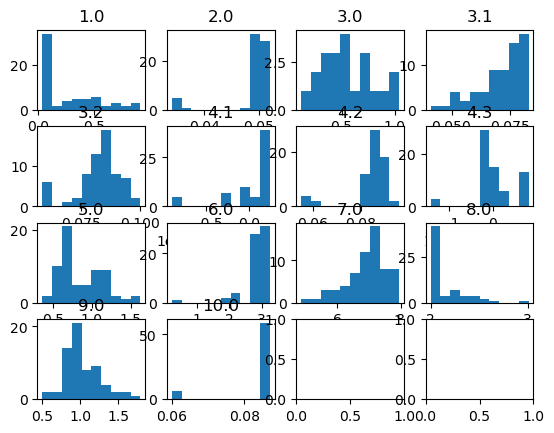

In [17]:
# make histograms
fig, axs = plt.subplots(4, 4)

frameIDList =  event_times1.index.get_level_values("EventFrameID_Reference").unique().to_list()
for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].hist(event_times1[frameID])
    axs.flat[idx].title.set_text(f"{frameID}")

### Plots for all simulations concatenated

In [18]:


sim_prod_list = [
    sim1_production,
    sim2_production,
    sim3_production,
    sim4_production,
    sim5_production,
    sim6_production
]

# Make a large pd structure with all of the data (batch ID is shifted)
c_production = sim1_production.copy()
c_production.EventFrameID_Reference = c_production.EventFrameID_Reference.apply(np.abs)

for sim in sim_prod_list[1:]:
    sim_temp = sim.copy()
    sim_temp.EventFrameID_Reference = sim_temp.EventFrameID_Reference.apply(np.abs)
    sim_temp.BatchID += c_production.BatchID.max() - sim_temp.BatchID.min() + 1
    c_production = pd.concat([c_production,sim_temp])

c_event_times = c_production.groupby(["EventFrameID_Reference", "BatchID" ]).Time_out.apply( np.array ).apply( lambda x : x[-1] - x[0])

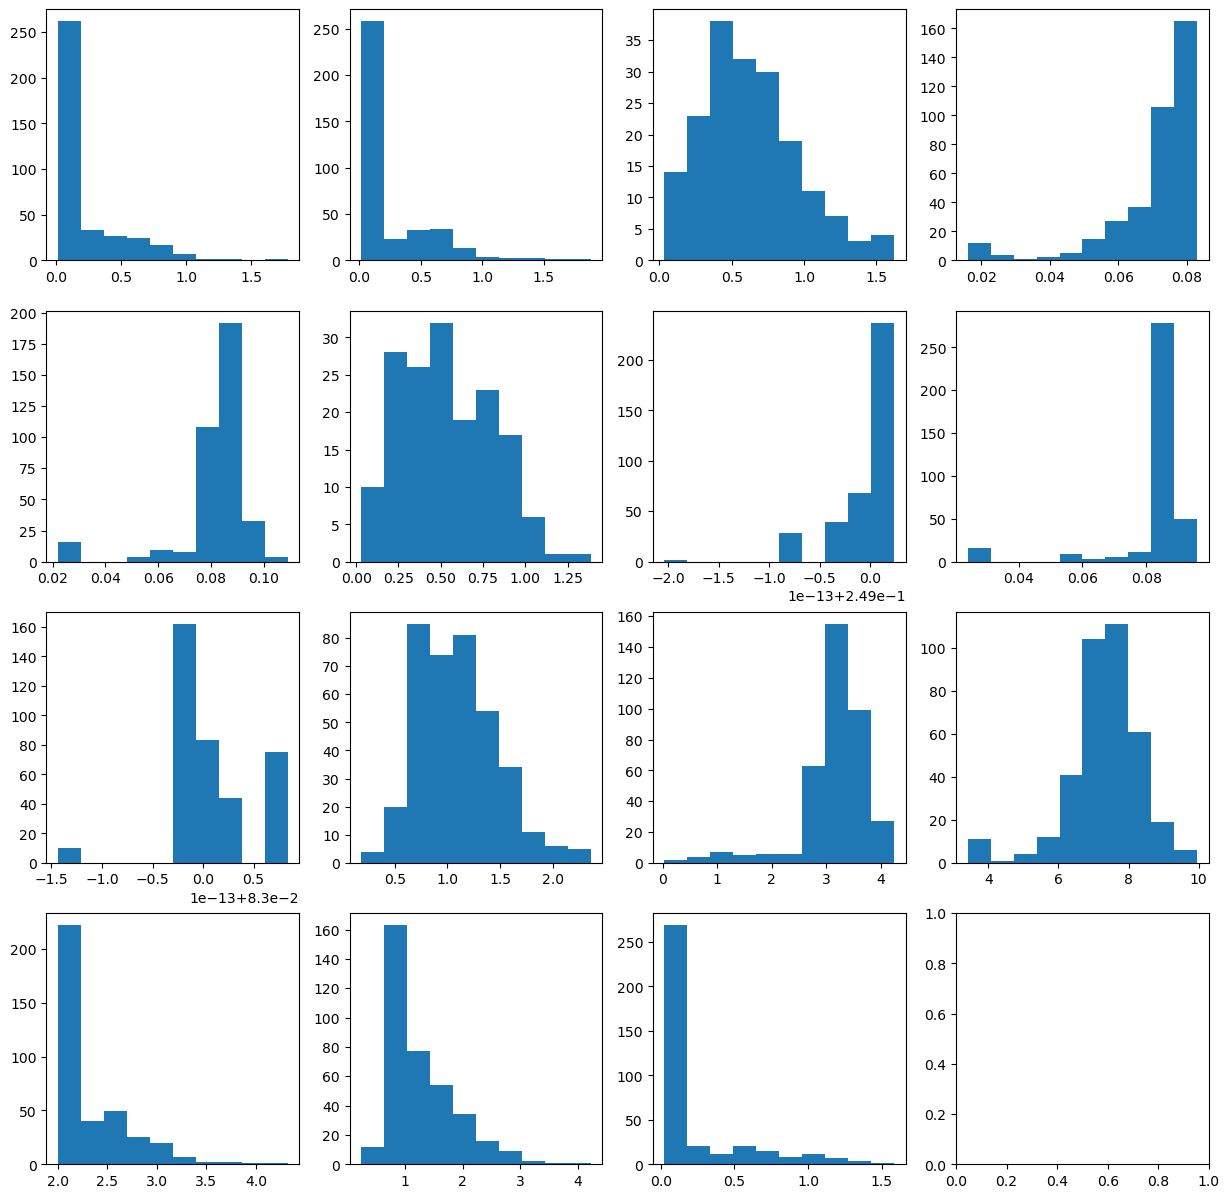

In [69]:
# make histograms
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

frameIDList =  c_event_times.index.get_level_values("EventFrameID_Reference").unique().to_list()
for idx, frameID in enumerate(frameIDList):
    axs.flat[idx].hist(c_event_times[frameID], bins = 10)
    # axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")

In [56]:
# correlation
# fig, axs = plt.subplots(4, 4, figsize=(15, 15))

frameIDList =  np.array(c_event_times.index.get_level_values("EventFrameID_Reference").unique().to_list())
frame_length = np.array([c_event_times[frameID].__len__() for frameID in frameIDList])

# Only loop over those with observations each time

corr_mat = np.zeros(((frame_length == np.max(frame_length)).sum(),(frame_length == np.max(frame_length)).sum()))
for idx1, frameID1 in enumerate(frameIDList[frame_length == np.max(frame_length)]):
    for idx2, frameID2 in enumerate(frameIDList[frame_length == np.max(frame_length)]):
        corr_mat[idx1,idx2] = np.corrcoef(c_event_times[frameID1].values,c_event_times[frameID2].values)[0,1]
    # axs.flat[idx].hist(c_event_times[frameID], bins = 50)
    # axs.flat[idx].title.set_text(f"eventID {frameID}, {c_event_times[frameID].count()}")

[1.  2.  3.1 3.2 4.1 4.2 4.3 5.  6. ]


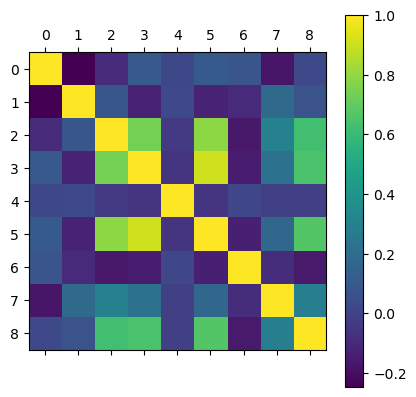

In [64]:
plt.matshow(corr_mat)
plt.colorbar();
print(frameIDList[frame_length == np.max(frame_length)])

- Der er nogle hvor der er markant færre observationer (altså batches, hvor processen ikke gennemgår et stadie (3.0 og 4.0 især))

- Undersøg sammenhæng mellem minus batchID og processen
- Fit histogrammer (1.0, 2.0, 3.0, måske også 3.1 og 3.2)
- sammenhæng i histogrammer og om det er negative farver (hypotese: noget der er blevet pillet ved)